<a href="https://colab.research.google.com/github/Akshita0501/OIBSIP/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/iris.zip'

In [ ]:
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
csv_file_path = '/content/Iris.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Read the CSV file into a DataFrame
iris_data = pd.read_csv(csv_file_path)
# Display the first few rows of the dataset
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Split the data into features (X) and target variable (y)
X = iris_data.drop(['Id', 'Species'], axis=1)
y = iris_data['Species']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Example new data for classification
new_data = pd.DataFrame({
    'SepalLengthCm': [5.0],
    'SepalWidthCm': [3.5],
    'PetalLengthCm': [1.5],
    'PetalWidthCm': [0.2]
})

# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict the class using the trained KNN model
predicted_species = knn.predict(new_data_scaled)

# Display the predicted species
print(f"Predicted Species: {predicted_species[0]}")


Predicted Species: Iris-setosa


In [ ]:

new_data = pd.DataFrame({
    'SepalLengthCm': [6.7],
    'SepalWidthCm': [3],
    'PetalLengthCm': [5],
    'PetalWidthCm': [1.7]
})
new_data_scaled = scaler.transform(new_data)

predicted_species = knn.predict(new_data_scaled)

print(f"Predicted Species: {predicted_species[0]}")


Predicted Species: Iris-versicolor


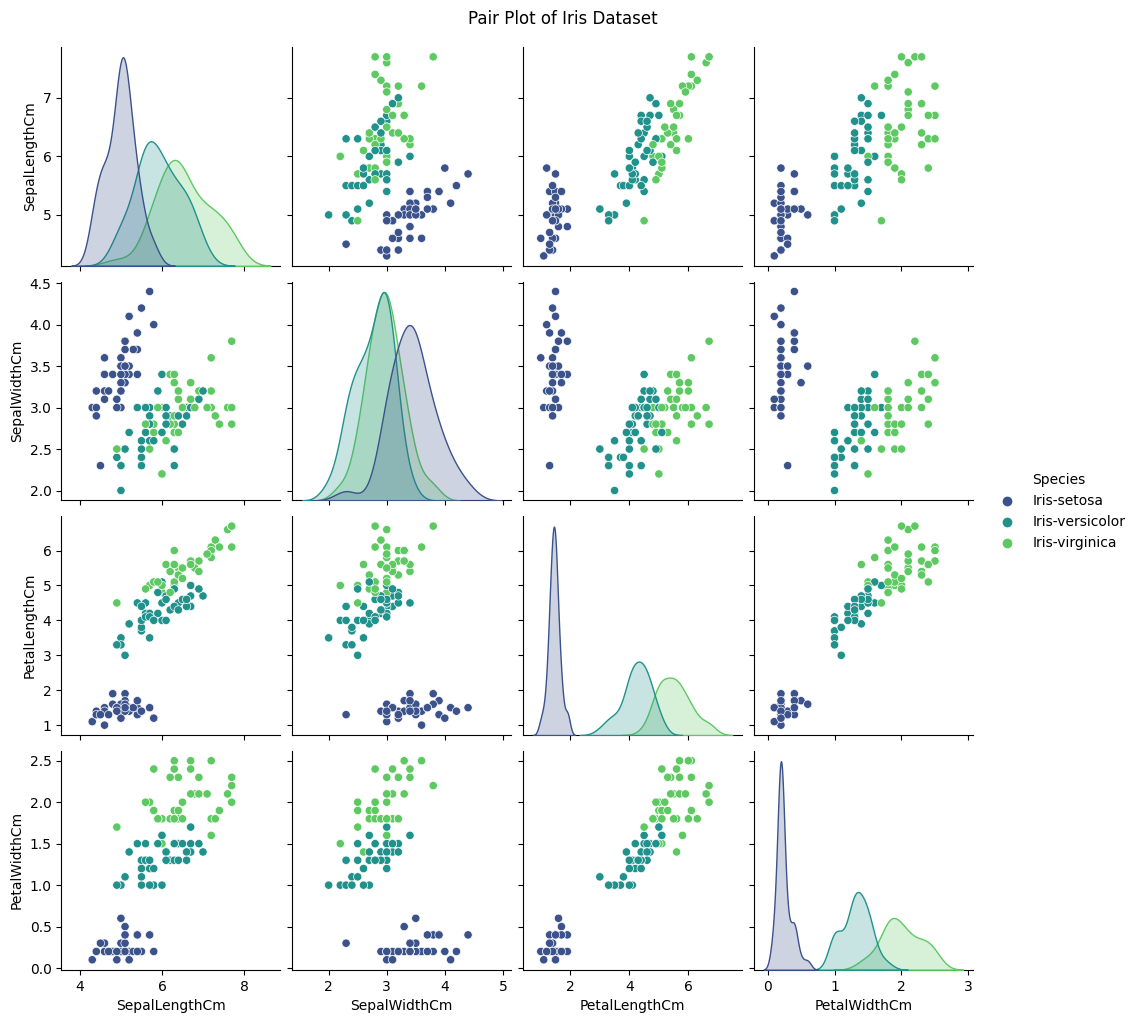

In [ ]:
# Assuming you have already trained the KNN model (knn) and standardized the features (scaler)

import seaborn as sns

# Concatenate features and target variable for the pair plot
pair_plot_data = pd.concat([X_train, y_train], axis=1)

# Create a pair plot
sns.pairplot(pair_plot_data, hue="Species", palette="viridis")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()
